# Different visualizations for on Parking Tickets and Parking Meters

In [21]:
!pip install geopandas


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import LineString, Point, Polygon
from shapely import wkt, affinity

pd.set_option('display.width', 175)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

path = "../data/cleaned_data"

## Import Data

Import our cleaned and transformed data

In [23]:
def df_to_gdf(df: pd.DataFrame, geometry_key: str = "Geometry") -> gpd.GeoDataFrame:
    df[geometry_key] = df[geometry_key].apply(wkt.loads)
    return gpd.GeoDataFrame(df, geometry=geometry_key)

## Meters Data

In [24]:
meters_df = pd.read_csv(f"{path}/parking_meters.csv")
meters_df = df_to_gdf(meters_df)
meters_df.head()

,METERHEAD,TIMEINEFFE,Geo Local Area,METERID,Geometry
0,Twin,METER IN EFFECT: 9:00 AM TO 10:00 PM,Mount Pleasant,990002,POINT (49.264 -123.1)
1,Pay Station,METER IN EFFECT: 9:00 AM TO 10:00 PM,Grandview-Woodland,6C1306,POINT (49.273 -123.069)
2,Pay Station,METER IN EFFECT: 9:00 AM TO 10:00 PM,Kensington-Cedar Cottage,6C2619,POINT (49.261 -123.07)
3,Pay Station,METER IN EFFECT: 9:00 AM TO 10:00 PM,Grandview-Woodland,6C2016,POINT (49.266 -123.07)
4,Pay Station,METER IN EFFECT: 9:00 AM TO 10:00 PM,Kensington-Cedar Cottage,6C2711,POINT (49.26 -123.07)


In [25]:
tickets_df = pd.read_csv(f"{path}/parking_tickets.csv")
tickets_df = df_to_gdf(tickets_df)
tickets_df.head()

,Block,Street,EntryDate,Status,Year,BI_ID,month,dayofweek,Geometry,Neighbourhood
0,600,E 26TH AVE,2023-05-01,IS,2023,4487064,5,0,POINT (49.248 -123.064),Kensington-Cedar Cottage
1,1000,MAPLE ST,2023-05-01,IS,2023,4487104,5,0,POINT (49.263 -123.151),Kitsilano
2,1000,MAPLE ST,2023-05-01,IS,2023,4487105,5,0,POINT (49.263 -123.151),Kitsilano
3,1600,BURNABY ST,2023-05-01,IS,2023,4487110,5,0,POINT (49.285 -123.141),West End
4,1600,BURNABY ST,2023-05-01,IS,2023,4487111,5,0,POINT (49.285 -123.141),West End


In [26]:
boundaries_df = pd.read_csv(f"{path}/local_area_boundaries.csv")
boundaries_df = df_to_gdf(boundaries_df)
boundaries_df.head(3)

,Neighbourhood,Geometry
0,Downtown,"POLYGON ((49.29 -123.112, 49.288 -123.104, 49.289 -123.099, 49.273 -123.1, 49.273 -123.102, 49.273 -123.111, 49.272 -123.114, 49.27 -123.121, 49.27 -123.129, 49.275 -123.138, 49.277 -123.132, 49.284 -123.121, 49.294 -123.137, 49.296 -123.135, 49.292 -123.123, 49.29 -123.112))"
1,Hastings-Sunrise,"POLYGON ((49.293 -123.056, 49.294 -123.052, 49.294 -123.047, 49.293 -123.037, 49.294 -123.023, 49.293 -123.023, 49.266 -123.024, 49.265 -123.024, 49.265 -123.025, 49.265 -123.025, 49.265 -123.026, 49.265 -123.026, 49.264 -123.027, 49.264 -123.027, 49.264 -123.028, 49.264 -123.028, 49.263 -123.03, 49.263 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.033, 49.262 -123.044, 49.262 -123.044, 49.262 -123.057, 49.262 -123.057, 49.293 -123.056))"
2,Kerrisdale,"POLYGON ((49.216 -123.179, 49.215 -123.176, 49.215 -123.172, 49.215 -123.172, 49.215 -123.171, 49.215 -123.17, 49.215 -123.17, 49.215 -123.169, 49.215 -123.169, 49.215 -123.168, 49.214 -123.168, 49.214 -123.167, 49.214 -123.167, 49.214 -123.166, 49.214 -123.165, 49.213 -123.165, 49.213 -123.164, 49.213 -123.164, 49.213 -123.163, 49.213 -123.163, 49.213 -123.162, 49.212 -123.162, 49.212 -123.161, 49.212 -123.161, 49.212 -123.16, 49.212 -123.16, 49.211 -123.159, 49.211 -123.159, 49.211 -123.159, 49.211 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.151, 49.205 -123.151, 49.205 -123.15, 49.209 -123.149, 49.209 -123.148, 49.209 -123.149, 49.219 -123.148, 49.219 -123.14, 49.234 -123.14, 49.235 -123.155, 49.235 -123.17, 49.235 -123.179, 49.216 -123.179))"


In [27]:
exterior_boundaries = boundaries_df.copy()
exterior_boundaries["Geometry"] = exterior_boundaries["Geometry"].apply(
    lambda geom: LineString([(y, x) for x, y in geom.exterior.coords])
)

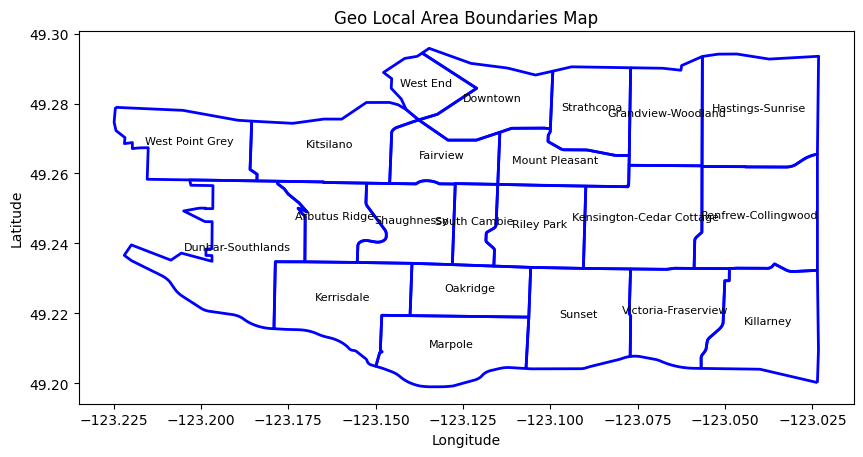

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

for idx, row in boundaries_df.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.y, centroid.x),
            fontsize=8,
            ha='center',
            color='black'
        )

ax.set_title("Geo Local Area Boundaries Map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Meter Locations

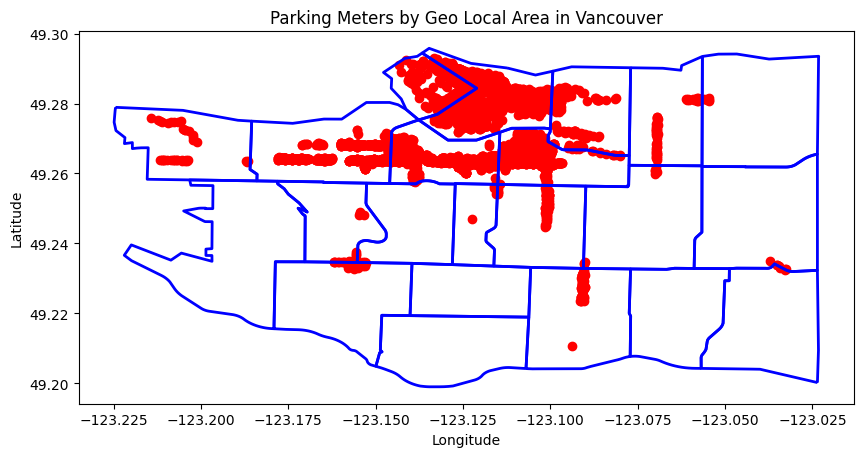

In [29]:

fig, ax = plt.subplots(figsize=(10, 10))

exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

meters = meters_df.copy()
meters["Geometry"] = meters["Geometry"].apply(lambda pt: Point(pt.y, pt.x))

meters.plot(ax=ax, color='red', linewidth=1)

ax.set_title("Parking Meters by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Ticket Locations

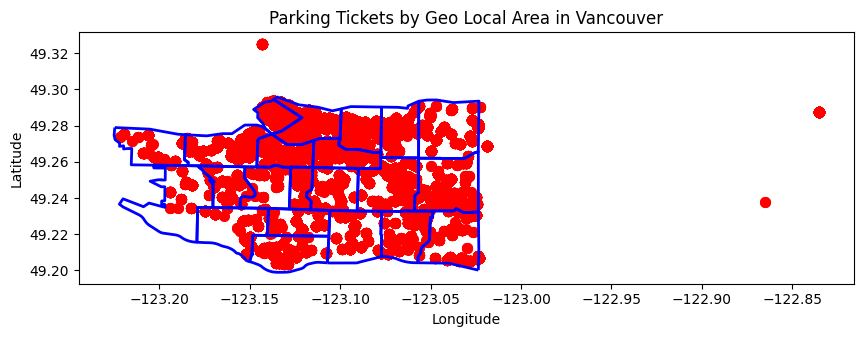

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

tickets = tickets_df.copy()
tickets["Geometry"] = tickets["Geometry"].apply(lambda pt: Point(pt.y, pt.x))

tickets.plot(ax=ax, color='red', linewidth=2)

ax.set_title("Parking Tickets by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# General Frequency Visualizations

* Amount of tickets per neighbourhood 


In [31]:
grouped_tickets_df = tickets.groupby("Neighbourhood").size().reset_index(name="TicketCount")

In [32]:
# largest_neighbourhood with tickets
grouped_tickets_df.sort_values("TicketCount", ascending=False).iloc[0]

Neighbourhood    Downtown
TicketCount         66576
Name: 1, dtype: object

In [33]:
neighbourhoods_df = boundaries_df.merge(grouped_tickets_df, left_on="Neighbourhood", right_on="Neighbourhood", how="outer")
neighbourhoods_df["TicketCount"] = neighbourhoods_df["TicketCount"].fillna(0)
neighbourhoods_df.head(2)

,Neighbourhood,Geometry,TicketCount
0,Arbutus Ridge,"POLYGON ((49.257 -123.153, 49.257 -123.165, 49.258 -123.165, 49.258 -123.178, 49.257 -123.178, 49.257 -123.178, 49.256 -123.176, 49.254 -123.175, 49.252 -123.172, 49.249 -123.17, 49.25 -123.171, 49.25 -123.172, 49.248 -123.171, 49.248 -123.171, 49.248 -123.17, 49.235 -123.17, 49.235 -123.155, 49.239 -123.155, 49.239 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.155, 49.24 -123.154, 49.24 -123.154, 49.24 -123.154, 49.24 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.154, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.153, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.241 -123.152, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.15, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.149, 49.24 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.148, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.241 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.242 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.243 -123.147, 49.244 -123.147, 49.244 -123.147, 49.244 -123.147, 49.251 -123.152, 49.251 -123.152, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.251 -123.153, 49.252 -123.153, 49.252 -123.153, 49.252 -123.153, 49.257 -123.153))",3027
1,Downtown,"POLYGON ((49.29 -123.112, 49.288 -123.104, 49.289 -123.099, 49.273 -123.1, 49.273 -123.102, 49.273 -123.111, 49.272 -123.114, 49.27 -123.121, 49.27 -123.129, 49.275 -123.138, 49.277 -123.132, 49.284 -123.121, 49.294 -123.137, 49.296 -123.135, 49.292 -123.123, 49.29 -123.112))",66576


## Tickets Per Neighbourhood

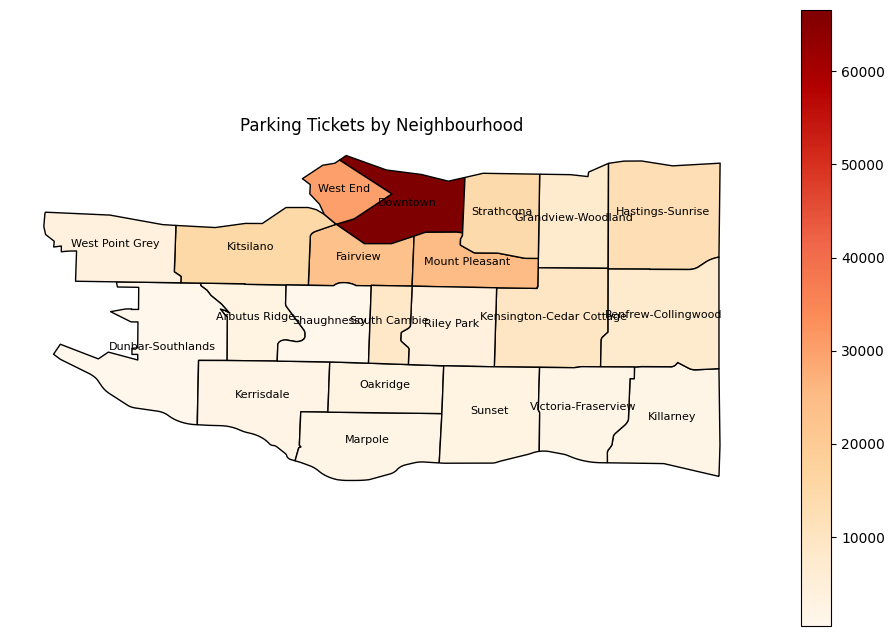

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

neighbourhoods = neighbourhoods_df.copy()
neighbourhoods["Geometry"] = neighbourhoods["Geometry"].apply(
    lambda geom: Polygon([(y, x) for x, y in geom.exterior.coords])
)

neighbourhoods.plot(column="TicketCount", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
for idx, row in neighbourhoods.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='black'
        )
ax.set_title("Parking Tickets by Neighbourhood")
ax.axis('off')
plt.show()

# Visualization of Downtown Neighbourhood

* tickets per day day of the week
* tickets per day date
* tickets per street in the neighbourhood

In [35]:
downtown_tickets = tickets_df[tickets_df["Neighbourhood"] == "Downtown"]

# simplify the view for now
downtown_tickets = downtown_tickets.drop(columns=["Status", "BI_ID"], axis=1)

downtown_tickets.head()

,Block,Street,EntryDate,Year,month,dayofweek,Geometry,Neighbourhood
7,800,RICHARDS ST,2023-05-01,2023,5,0,POINT (49.284 -123.112),Downtown
12,1200,W CORDOVA ST,2023-05-01,2023,5,0,POINT (49.288 -123.117),Downtown
49,800,RICHARDS ST,2023-03-08,2023,3,2,POINT (49.284 -123.112),Downtown
52,700,W PENDER ST,2023-03-08,2023,3,2,POINT (49.285 -123.115),Downtown
55,400,HOWE ST,2023-03-08,2023,3,2,POINT (49.285 -123.117),Downtown


## Tickets Per Day of the Week

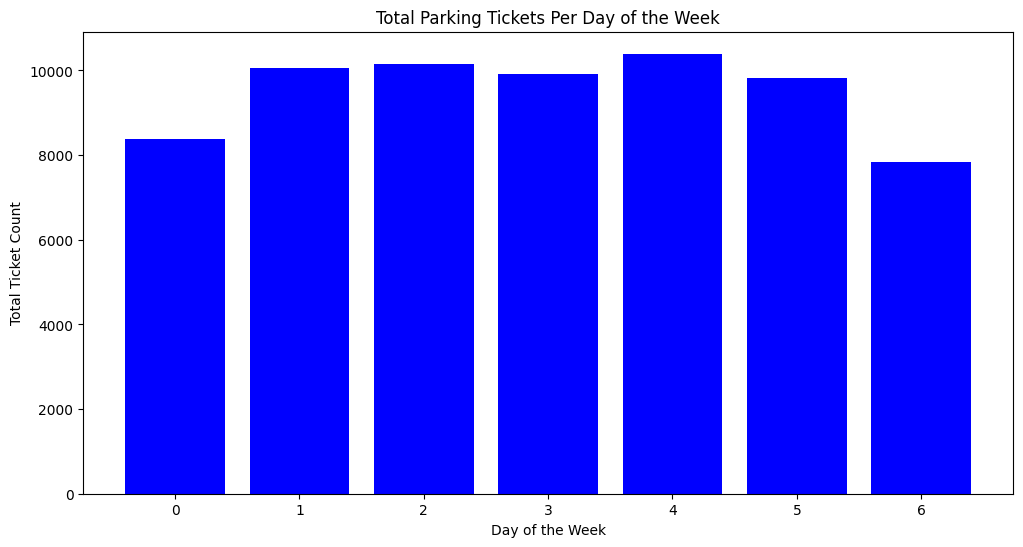

In [36]:
by_dotw = downtown_tickets.groupby("dayofweek").size().reset_index(name="TicketCount")
plt.figure(figsize=(12, 6))
plt.bar(by_dotw["dayofweek"], by_dotw["TicketCount"], color="blue")

plt.xlabel("Day of the Week")
plt.ylabel("Total Ticket Count")
plt.title("Total Parking Tickets Per Day of the Week")
plt.show()

## Tickets per Month

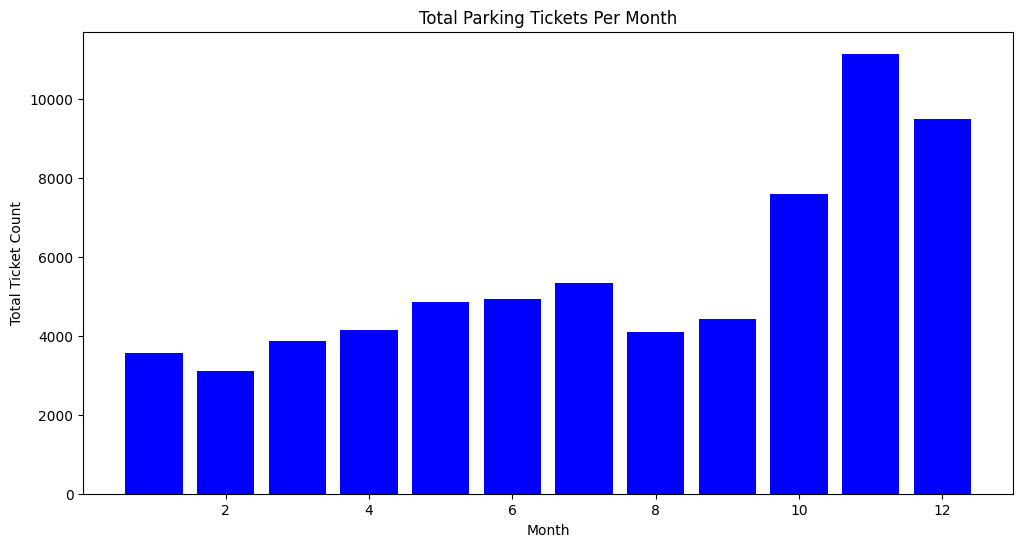

In [37]:
by_month = downtown_tickets.groupby("month").size().reset_index(name="TicketCount")
plt.figure(figsize=(12, 6))
plt.bar(by_month["month"], by_month["TicketCount"], color="blue")

plt.xlabel("Month")
plt.ylabel("Total Ticket Count")
plt.title("Total Parking Tickets Per Month")
plt.show()

## Tickets per Date

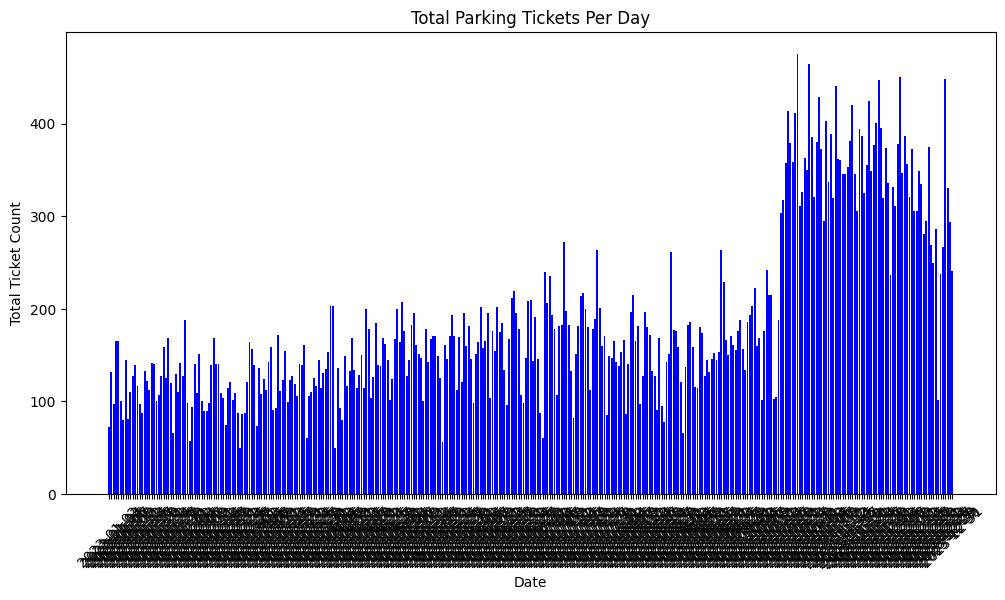

In [38]:
by_date = downtown_tickets.groupby("EntryDate").size().reset_index(name="TicketCount")
plt.figure(figsize=(12, 6))
plt.bar(by_date["EntryDate"], by_date["TicketCount"], color="blue")

plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Total Ticket Count")
plt.title("Total Parking Tickets Per Day")
plt.show()

## Tickets per Day of the Week and Street

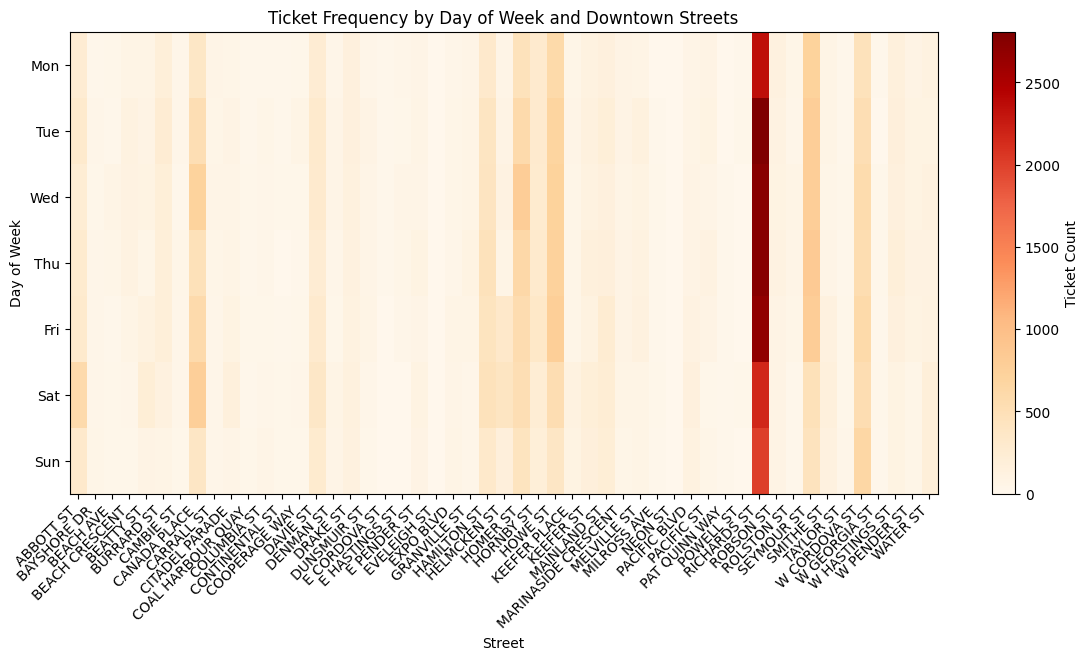

In [39]:
pivot = downtown_tickets.groupby(["dayofweek", "Street"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
cax = ax.imshow(pivot, aspect="auto", cmap="OrRd")

ax.set_title("Ticket Frequency by Day of Week and Downtown Streets")
ax.set_xlabel("Street")
ax.set_ylabel("Day of Week")
ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(7))
ax.set_xticklabels(pivot.columns, rotation=45, ha="right")
ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

fig.colorbar(cax, ax=ax, label="Ticket Count")
plt.show()

## Tickets per Month and Street

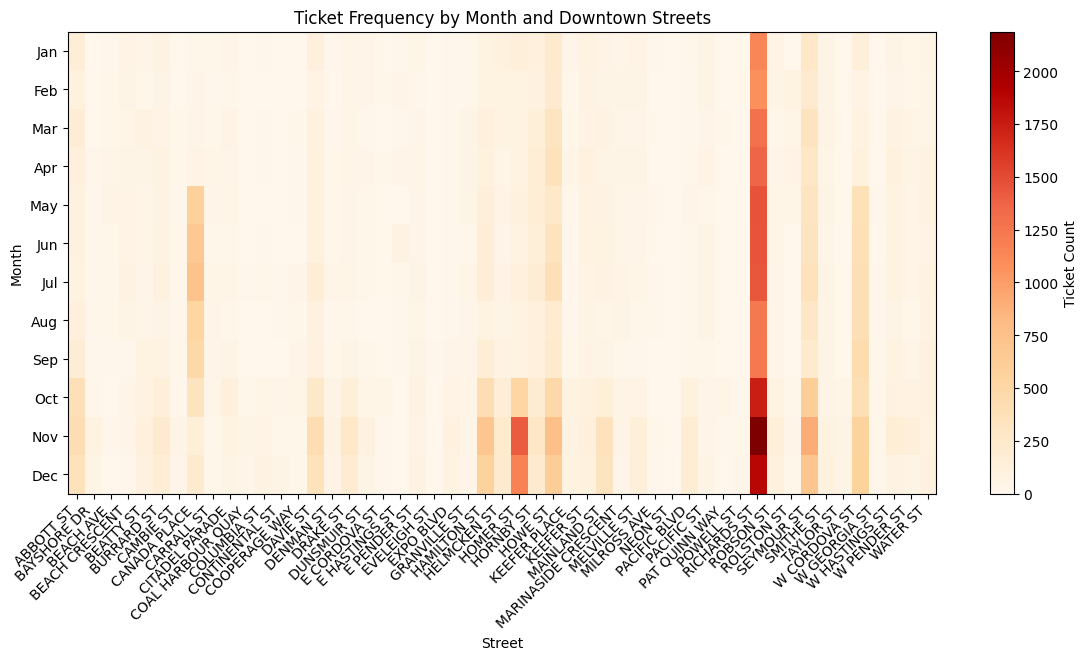

In [40]:
pivot = downtown_tickets.groupby(["month", "Street"]).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
cax = ax.imshow(pivot, aspect="auto", cmap="OrRd")

ax.set_title("Ticket Frequency by Month and Downtown Streets")
ax.set_xlabel("Street")
ax.set_ylabel("Month")
ax.set_xticks(np.arange(len(pivot.columns)))
ax.set_yticks(np.arange(12))
ax.set_xticklabels(pivot.columns, rotation=45, ha="right")
ax.set_yticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

fig.colorbar(cax, ax=ax, label="Ticket Count")
plt.show()